In [50]:
import pandas as pd
import matplotlib
from datasets import load_dataset


from IPython.display import display
pd.set_option('display.max_columns', None)


In [3]:
def preprocess_text_wmt14(examples):
    inputs = [ex["en"] for ex in examples["translation"]]
    targets = [ex["fr"] for ex in examples["translation"]]
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df

def preprocess_text_flores200(dataset_src, dataset_tgt):    
    inputs = dataset_flores200_eng['sentence']
    targets = dataset_flores200_fra['sentence']
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df


def num_of_words_in_lang_dataset(df, lang_code):
    df['word_count' + "_" + lang_code] = df[lang_code].apply(lambda x : len(str(x).split(" ")))
    return df


def describe_dataset_df(text_df):
    text_df = num_of_words_in_lang_dataset(text_df, 'en')
    text_df = num_of_words_in_lang_dataset(text_df, 'fr')
    display(text_df.head(10))
    display(text_df.describe())
    text_df.hist(bins = 100)
   
       

In [9]:
# Analyse WMT14  dataset
all_dataset_wmt14 = load_dataset("wmt14", "fr-en", split="validation")
all_dataset_wmt14

filtered_dataset= all_dataset_wmt14.filter(lambda example: print(len((example["translation"]["en"]).split(" "))))
filtered_dataset

Found cached dataset wmt14 (/home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)
                                                                                                                                                                                                      

9
12
26
17
15
12
18
25
19
21
17
31
15
10
16
12
20
23
28
13
14
13
35
4
26
28
11
9
16
10
14
20
18
6
17
24
18
26
5
13
17
16
9
12
8
19
21
27
29
28
16
12
8
21
11
5
7
28
25
28
21
7
13
9
45
24
15
19
6
20
27
22
3
9
23
17
22
14
5
20
9
11
5
13
17
1
16
17
20
1
10
11
11
15
17
1
16
9
10
16
11
17
8
4
20
23
37
15
26
28
22
24
16
59
9
15
39
50
17
30
30
29
3
27
42
32
18
13
22
25
13
29
31
29
11
1
32
26
14
49
2
13
18
30
26
11
17
13
10
7
13
10
35
14
20
15
21
5
15
12
19
14
12
23
11
9
17
15
9
6
21
19
13
14
5
10
14
19
9
18
9
7
14
17
13
13
50
28
15
6
43
29
30
28
32
23
13
20
13
25
8
3
32
17
26
31
13
13
14
19
16
6
34
14
26
38
17
30
23
7
19
23
32
24
12
16
17
33
27
15
5
7
48
19
28
15
14
42
6
40
8
24
4
1
40
31
34
43
22
5
11
6
15
5
7
9
13
6
6
6
20
11
12
9
16
14
15
7
1
7
17
13
5
9
9
10
9
14
9
6
19
8
8
6
12
23
11
5
17
5
9
15
7
9
6
14
5
5
9
10
6
22
10
19
4
22
6
8
4
7
7
9
22
15
11
15
7
22
10
11
12
13
14
10
10
7
9
17
12
2
8
10
9
7
13
21
14
6
8
13
4
8
11
10
15
5
4
14
7
19
28
31
13
14
37
13
20
22
33
11
12
22
5
17
15
16
10


Dataset({
    features: ['translation'],
    num_rows: 0
})

,en,fr,word_count_en,word_count_fr
0,A Republican strategy to counter the re-electi...,Une stratégie républicaine pour contrer la réé...,9,8
1,Republican leaders justified their policy by t...,Les dirigeants républicains justifièrent leur ...,12,15
2,"However, the Brennan Centre considers this a m...","Or, le Centre Brennan considère cette dernière...",26,29
3,"Indeed, Republican lawyers identified only 300...","D'ailleurs, les avocats républicains n'ont rec...",17,17
4,One thing is certain: these new provisions wil...,Une chose est certaine: ces nouvelles disposit...,15,13
5,"In this sense, the measures will partially und...","En ce sens, ces mesures mineront en partie le ...",12,12
6,"Unlike in Canada, the American States are resp...","Contrairement au Canada, les États américains ...",18,15
7,It is in this spirit that a majority of Americ...,C'est dans cet esprit qu'une majorité de gouve...,25,26
8,This phenomenon gained momentum following the ...,Ce phénomène a pris de l'ampleur après les éle...,19,22
9,"As a result, 180 bills restricting the exercis...","En conséquence, 180 projets de lois restreigna...",21,23


,word_count_en,word_count_fr
count,3000.000000,3000.000000
mean,18.696000,20.517000
std,10.998268,12.309842
min,1.000000,1.000000
25%,11.000000,12.000000
50%,17.000000,18.000000
75%,24.000000,27.000000
max,82.000000,100.000000


Loading cached processed dataset at /home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4/cache-df81545cd039bd67.arrow


A Republican strategy to counter the re-election of Obama
Dataset({
    features: ['translation'],
    num_rows: 15
})


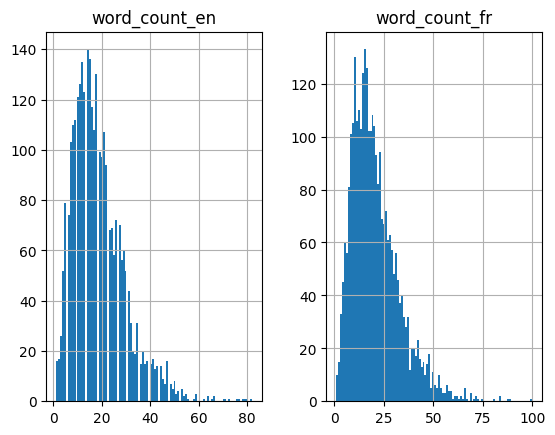

In [8]:
wmt14_df = preprocess_text_wmt14(all_dataset_wmt14)
describe_dataset_df(wmt14_df)
print(all_dataset_wmt14[0]["translation"]["en"])



Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/fra_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)
Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/eng_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)


,en,fr,word_count_en,word_count_fr
0,"On Monday, scientists from the Stanford Univer...",Des scientifiques de l’école de médecine de l’...,43,59
1,Lead researchers say this may bring early dete...,"Selon les chercheurs principaux, cela pourrait...",36,53
2,The JAS 39C Gripen crashed onto a runway at ar...,Le JAS 39C Gripen s’est écrasé sur une piste a...,24,26
3,The pilot was identified as Squadron Leader Di...,Le pilote a été identifié comme étant le chef ...,9,12
4,Local media reports an airport fire vehicle ro...,La presse locale a rapporté qu'un véhicule de ...,11,20
5,28-year-old Vidal had joined Barça three seaso...,"Vidal, 28 ans, avait rejoint le Barça il y a t...",10,16
6,"Since moving to the Catalan-capital, Vidal had...","Depuis son arrivée dans la capitale catalane, ...",13,15
7,The protest started around 11:00 local time (U...,La manifestation a commencé vers 11 h heure lo...,22,29
8,"Just after 11:00, protesters blocked traffic o...","À Whitehall, peu après 11 h 00, des manifestan...",12,19
9,"At 11:20, the police asked the protesters to m...","À 11 h 20, la police a demandé aux manifestant...",29,29


,word_count_en,word_count_fr
count,997.000000,997.000000
mean,21.018054,23.960883
std,6.844051,8.086845
min,6.000000,5.000000
25%,16.000000,18.000000
50%,20.000000,23.000000
75%,25.000000,29.000000
max,48.000000,59.000000


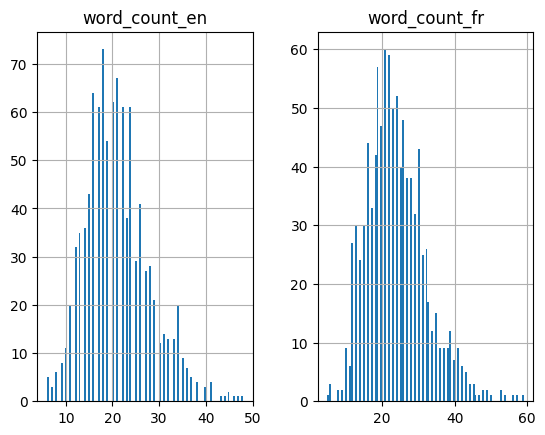

In [56]:
dataset_flores200_fra = load_dataset("facebook/flores", "fra_Latn", split="dev")
dataset_flores200_eng = load_dataset("facebook/flores", "eng_Latn", split="dev")

flores200_df = preprocess_text_flores200(dataset_flores200_eng, dataset_flores200_fra)
describe_dataset_df(flores200_df)


In [41]:

print(filtered_dataset['translation'])


Loading cached processed dataset at /home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4/cache-a6251a34d21894be.arrow


[]


In [24]:
!ls ~/Benchmark/metric_logs

nllb-200-distilled-600M_flores200_metrics.csv  t5-base_wmt14_metrics.csv
nllb-200-distilled-600M_wmt14_metrics.csv      t5-large_flores200_metrics.csv
t5-base_flores200_metrics.csv		       t5-large_wmt14_metrics.csv


In [36]:
# Analyse the experiments!
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(CSV_metrics_folder + "t5-large_wmt14_metrics.csv")
data = data.sort_values(by=['sacrebleu'], ascending=False)


In [37]:
import os
# Merge all metrics to one table
CSV_metrics_folder = "metric_logs/"
csv_files = os.listdir( CSV_metrics_folder )

files_df_dict = {}
# This would print all the files and directories
for file in csv_files:
    data= pd.read_csv(CSV_metrics_folder + file)
    files_df_dict[file] = data

df_merge_all = pd.concat(files_df_dict.values(), ignore_index=True)
df_merge_all

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,...,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
0,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013056,0.013297,1.455264e+03,1.428870e+03
1,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.010052,0.014512,1.890149e+03,1.309284e+03
2,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.012970,0.014603,1.464877e+03,1.301105e+03
3,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.014617,0.013199,1.299871e+03,1.439478e+03
4,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.014001,0.014460,1.357062e+03,1.313986e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,...,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005269,0.005731,5.974678e+06,6.984593e+06
176,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,4,128,...,40.921532,42.769810,67.942282,65.826641,0.699303,45.297327,0.008987,0.005779,3.502877e+06,7.038210e+06
177,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,1,128,...,39.979133,42.217735,65.891274,63.764563,0.676340,43.665924,0.005105,0.005507,6.166906e+06,7.120985e+06
178,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,...,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005203,0.005648,6.050085e+06,7.087948e+06


In [46]:
df_merge_wmt14 = df_merge_all[df_merge_all["dataset_name"] == "wmt14"]
df_merge_flores200 = df_merge_all[df_merge_all["dataset_name"] == "flores200"]

df_merge_wmt14 = df_merge_wmt14.sort_values(by=['sacrebleu'], ascending=False)
df_merge_flores200 = df_merge_flores200.sort_values(by=['sacrebleu'], ascending=False)


In [43]:
display(df_merge_wmt14)
df_merge_wmt14.describe()

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,...,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
0,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.013056,0.013297,1.455264e+03,1.428870e+03
1,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.010052,0.014512,1.890149e+03,1.309284e+03
2,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.012970,0.014603,1.464877e+03,1.301105e+03
3,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.014617,0.013199,1.299871e+03,1.439478e+03
4,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,...,100.000000,100.000000,100.000000,100.000000,0.999023,19.000000,0.014001,0.014460,1.357062e+03,1.313986e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,facebook/nllb-200-distilled-600M,615073792,wmt14,3000,2627,en,fr,32,2,128,...,27.425771,30.084878,56.843514,54.532166,0.578510,38.013704,0.005422,0.005827,1.443150e+07,1.713913e+07
104,facebook/nllb-200-distilled-600M,615073792,wmt14,3000,2627,en,fr,32,4,128,...,27.499209,30.117236,57.100302,54.776051,0.581480,38.506662,0.008206,0.005847,9.534501e+06,1.730206e+07
105,facebook/nllb-200-distilled-600M,615073792,wmt14,3000,2627,en,fr,32,1,128,...,27.368787,30.121505,56.482198,54.173021,0.573324,37.304911,0.005440,0.005832,1.438355e+07,1.680295e+07
106,facebook/nllb-200-distilled-600M,615073792,wmt14,3000,2627,en,fr,32,2,128,...,27.425771,30.084878,56.843514,54.532166,0.578510,38.013704,0.005409,0.005804,1.446456e+07,1.720621e+07


,total_params,dataset_size,dataset_size_after_filter_wrt_input_len,batch_size,beam_size,max_gen_length,max_input_seq_length,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
count,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,1.080000e+02
mean,5.252151e+08,1500.500000,1166.666667,31.333333,2.333333,128.0,14.666667,56.991865,60.595095,76.769515,75.492610,0.773444,28.074801,0.015883,0.009592,4.504714e+06,5.014095e+06
std,2.205709e+08,1506.490714,1271.560143,3.962440,1.253034,0.0,12.716903,31.532665,29.645303,20.165859,21.213344,0.204700,8.289943,0.049157,0.004572,5.619017e+06,6.801916e+06
min,2.229036e+08,1.000000,1.000000,8.000000,1.000000,128.0,-1.000000,23.961199,26.170775,54.081672,51.815598,0.552219,19.000000,0.005112,0.005119,5.638867e+01,1.224573e+03
25%,2.229036e+08,1.000000,1.000000,32.000000,1.000000,128.0,-1.000000,31.691113,36.431702,57.288980,54.965685,0.571534,19.000000,0.006253,0.005848,2.119383e+03,2.734712e+03
50%,6.150738e+08,1500.500000,685.500000,32.000000,2.000000,128.0,15.000000,42.106626,49.247062,74.104826,72.540742,0.756794,29.556204,0.008694,0.007518,7.321939e+05,9.478991e+05
75%,7.376681e+08,3000.000000,2627.000000,32.000000,4.000000,128.0,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,33.875143,0.011289,0.014396,8.068498e+06,7.318641e+06
max,7.376681e+08,3000.000000,3000.000000,32.000000,4.000000,128.0,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,43.587667,0.372415,0.023508,1.991080e+07,2.270687e+07


In [42]:
df_merge_flores200

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,...,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
108,t5-large,737668096,flores200,1,1,en,fr,32,1,128,...,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.016619,0.012467,3.610242e+03,6.978332e+03
109,t5-large,737668096,flores200,1,1,en,fr,32,2,128,...,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.011861,0.013890,5.058406e+03,6.263335e+03
110,t5-large,737668096,flores200,1,1,en,fr,32,4,128,...,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.014404,0.013996,4.165583e+03,6.216263e+03
111,t5-large,737668096,flores200,1,1,en,fr,32,1,128,...,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.013937,0.012381,4.304957e+03,7.026997e+03
112,t5-large,737668096,flores200,1,1,en,fr,32,2,128,...,14.534554,20.589594,53.941503,49.498881,0.424377,87.000000,0.012221,0.013922,4.909724e+03,6.249099e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,...,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005269,0.005731,5.974678e+06,6.984593e+06
176,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,4,128,...,40.921532,42.769810,67.942282,65.826641,0.699303,45.297327,0.008987,0.005779,3.502877e+06,7.038210e+06
177,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,1,128,...,39.979133,42.217735,65.891274,63.764563,0.676340,43.665924,0.005105,0.005507,6.166906e+06,7.120985e+06
178,facebook/nllb-200-distilled-600M,615073792,flores200,997,898,en,fr,32,2,128,...,40.503122,42.550265,67.093305,64.965195,0.689146,44.577951,0.005203,0.005648,6.050085e+06,7.087948e+06


In [51]:
df_merge_flores200_multiple_sentences = df_merge_flores200[df_merge_flores200["dataset_size"] != 1]
display(df_merge_flores200_multiple_sentences)

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
146,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006225,0.007850,751165.94,7.299693e+05
149,t5-base,222903552,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006009,0.007937,778142.40,7.219797e+05
125,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.011072,0.019855,422339.10,2.891444e+05
122,t5-large,737668096,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.099247,51.782019,68.824590,67.056401,0.685519,28.849246,0.012197,0.019412,383378.90,2.957427e+05
121,t5-large,737668096,flores200,997,199,en,fr,32,2,128,15,pad_to_max_length,46.734531,51.371105,68.469337,66.729572,0.684879,28.688442,0.010895,0.015007,429184.16,3.804351e+05
124,t5-large,737668096,flores200,997,199,en,fr,32,2,128,15,do_not_pad,46.734531,51.371105,68.469337,66.729572,0.684879,28.688442,0.011110,0.014793,420871.72,3.859292e+05
148,t5-base,222903552,flores200,997,199,en,fr,32,2,128,15,do_not_pad,46.700698,51.403767,68.118317,66.419358,0.681391,28.673367,0.006194,0.007623,754967.94,7.484951e+05
145,t5-base,222903552,flores200,997,199,en,fr,32,2,128,15,pad_to_max_length,46.700698,51.403767,68.118317,66.419358,0.681391,28.673367,0.006133,0.007602,762475.56,7.506031e+05
123,t5-large,737668096,flores200,997,199,en,fr,32,1,128,15,do_not_pad,46.639147,50.786095,68.327292,66.700947,0.687270,28.216080,0.010783,0.014988,433641.97,3.746347e+05
120,t5-large,737668096,flores200,997,199,en,fr,32,1,128,15,pad_to_max_length,46.639147,50.786095,68.327292,66.700947,0.687270,28.216080,0.010720,0.014812,436177.00,3.790729e+05


Some first insight: 
We initially padded our tokenizers if sentence length is short.
Then, from our first experimentation, notice that there is a trend in the column max_length and beam size. 
We wondered whether this has to do with padding so we decided to test out with it by adding a new hyperparameter: "no_pad_fill"





In [52]:
df_merge_wmt14_multiple_sentences = df_merge_wmt14[df_merge_wmt14["dataset_size"] != 1]
df_merge_wmt14_multiple_sentences 

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
20,t5-large,737668096,wmt14,3000,3000,en,fr,32,4,128,-1,pad_to_max_length,32.789237,37.810019,58.650936,56.311633,0.580000,39.982000,0.012072,0.023508,7878415.5,5.102418e+06
23,t5-large,737668096,wmt14,3000,3000,en,fr,32,4,128,-1,do_not_pad,32.789237,37.810019,58.650936,56.311633,0.580000,39.982000,0.011936,0.023301,7967884.0,5.147706e+06
35,t5-large,737668096,wmt14,3000,2627,en,fr,32,4,128,30,do_not_pad,32.684899,37.723829,58.276515,55.978628,0.578750,33.875143,0.011153,0.021735,6493999.5,4.094283e+06
32,t5-large,737668096,wmt14,3000,2627,en,fr,32,4,128,30,pad_to_max_length,32.684899,37.723829,58.276515,55.978628,0.578750,33.875143,0.011361,0.021791,6375170.0,4.083831e+06
22,t5-large,737668096,wmt14,3000,3000,en,fr,32,2,128,-1,do_not_pad,32.630036,37.582780,58.532783,56.207516,0.578852,39.766333,0.010917,0.015976,8712280.0,7.467531e+06
19,t5-large,737668096,wmt14,3000,3000,en,fr,32,2,128,-1,pad_to_max_length,32.630036,37.582780,58.532783,56.207516,0.578852,39.766333,0.011178,0.016412,8508483.0,7.269011e+06
28,t5-large,737668096,wmt14,3000,1370,en,fr,32,4,128,15,pad_to_max_length,32.551606,37.533705,57.000026,54.811899,0.570629,22.478832,0.018737,0.016295,1460988.4,1.889937e+06
29,t5-large,737668096,wmt14,3000,1370,en,fr,32,4,128,15,do_not_pad,32.551606,37.533705,57.000026,54.811899,0.570629,22.478832,0.011362,0.016096,2409316.5,1.913223e+06
34,t5-large,737668096,wmt14,3000,2627,en,fr,32,2,128,30,do_not_pad,32.413550,37.403628,58.093103,55.810080,0.577347,33.669204,0.011321,0.014941,6397322.0,5.919759e+06
31,t5-large,737668096,wmt14,3000,2627,en,fr,32,2,128,30,pad_to_max_length,32.413550,37.403628,58.093103,55.810080,0.577347,33.669204,0.011127,0.014867,6509140.5,5.949543e+06


Also, for latency and throughput, we first recorded it outside model.generate(). but, in order to truly analyse the inference speed, it is better to break down into the encoder and decoder speed. 
The other reason is that we want to normalise this metric, since working with variable inputs means that some batches may finish faster than others - it is not correct to compare inference speed of sentence length 10 vs another sample with sentence length 50. hence, we need to normalise it. 
To do that, we divide the latency for encoder by the number of tokens. 




In [60]:
df_merge_wmt14_single_sentence = df_merge_wmt14[df_merge_wmt14["dataset_size"] == 1].drop(["sacrebleu", "spBleu", "chrf" ,'chrfpp', 'meteor'], axis=1)
df_merge_wmt14_single_sentence = df_merge_wmt14_single_sentence.sort_values(by=['encoder_latency_s'], ascending=False)
df_merge_wmt14_single_sentence

,model_name,total_params,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
80,facebook/nllb-200-distilled-600M,615073792,wmt14,1,1,en,fr,32,1,128,15,pad_to_max_length,30.0,0.372415,0.005318,56.388670,5641.676950
74,facebook/nllb-200-distilled-600M,615073792,wmt14,1,1,en,fr,32,1,128,-1,pad_to_max_length,30.0,0.370483,0.005535,56.682724,5419.642508
14,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,30,pad_to_max_length,19.0,0.015490,0.015516,1226.604600,1224.573303
3,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,-1,do_not_pad,19.0,0.014617,0.013199,1299.871000,1439.478482
12,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,30,pad_to_max_length,19.0,0.014093,0.013428,1348.214000,1414.973125
4,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,-1,do_not_pad,19.0,0.014001,0.014460,1357.061800,1313.986482
5,t5-large,737668096,wmt14,1,1,en,fr,32,4,128,-1,do_not_pad,19.0,0.013955,0.014377,1361.514900,1321.585584
6,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,15,pad_to_max_length,19.0,0.013896,0.012992,1367.252300,1462.405223
15,t5-large,737668096,wmt14,1,1,en,fr,32,1,128,30,do_not_pad,19.0,0.013872,0.013503,1369.667000,1407.131926
10,t5-large,737668096,wmt14,1,1,en,fr,32,2,128,15,do_not_pad,19.0,0.013612,0.014454,1395.829100,1314.524293


I kept the max_gen_length constant, since I wasn't sure if it was a useful metric for machine translation (at least for my purposes here, since the maximum number of tokens a sentence can have is around 80 or something like that), but i could be wrong. Yesterday I showed you that max_gen_length did slightly better than 256. My speculation that maybe one of the results' generation got truncuated from the decoder, but that does not mean the translation is better

Oh so, we wanted to investigate the low gen_length, so we wanted to check the padding if it destroys accuracy. in theory, it shouldnt. we see from our experiments that it doesnt. 




In [9]:


# # Create subplots for different metrics
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# # Plot 1: sacrebleu vs beam_size
# data.plot(x='beam_size', y='sacrebleu', kind='bar', ax=axes[0, 0], title='sacrebleu vs beam_size')
# axes[0, 0].set_xlabel('Beam Size')
# axes[0, 0].set_ylabel('sacrebleu')

# # Plot 2: spBleu vs beam_size
# data.plot(x='beam_size', y='spBleu', kind='line', ax=axes[0, 1], title='spBleu vs beam_size')
# axes[0, 1].set_xlabel('Beam Size')
# axes[0, 1].set_ylabel('spBleu')

# # Plot 3: chrf vs beam_size
# data.plot(x='beam_size', y='chrf', kind='line', ax=axes[1, 0], title='chrf vs beam_size')
# axes[1, 0].set_xlabel('Beam Size')
# axes[1, 0].set_ylabel('chrf')

# # Plot 4: chrfpp vs beam_size
# data.plot(x='beam_size', y='chrfpp', kind='line', ax=axes[1, 1], title='chrfpp vs beam_size')
# axes[1, 1].set_xlabel('Beam Size')
# axes[1, 1].set_ylabel('chrfpp')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# Calculate mean and standard deviation of each metric
metrics = ['sacrebleu', 'spBleu', 'chrf', 'chrfpp']
for metric in metrics:
    mean = data[metric].mean()
    std = data[metric].std()
    print(f"Metric: {metric}\nMean: {mean:.2f}\nStandard Deviation: {std:.2f}\n")

Metric: sacrebleu
Mean: 31.95
Standard Deviation: 1.09

Metric: spBleu
Mean: 37.66
Standard Deviation: 1.43

Metric: chrf
Mean: 57.71
Standard Deviation: 1.34

Metric: chrfpp
Mean: 55.35
Standard Deviation: 1.40



In [10]:
# Find the row with the highest value for each metric
best_hyperparameters = {}
for metric in metrics:
    best_row = data[data[metric] == data[metric].max()]  # Assumes higher value is better
    best_hyperparameters[metric] = best_row.iloc[0]

# Display the best hyperparameters for each metric
for metric, best_row in best_hyperparameters.items():
    print(f"Best hyperparameters for {metric}:")
    print(best_row)
    print("\n")

Best hyperparameters for sacrebleu:
Unnamed: 0                   0
sacrebleu            32.878556
spBleu               38.882182
chrf                  58.76393
chrfpp               56.420142
gen_len                 39.982
model_name            t5-large
dataset_name             wmt14
beam_size                    4
batch_size                  32
max_length                 128
max_source_length         1024
src_lang                    en
tgt_lang                    fr
Name: 8, dtype: object


Best hyperparameters for spBleu:
Unnamed: 0                   0
sacrebleu            32.878556
spBleu               38.882182
chrf                  58.76393
chrfpp               56.420142
gen_len                 39.982
model_name            t5-large
dataset_name             wmt14
beam_size                    4
batch_size                  32
max_length                 128
max_source_length         1024
src_lang                    en
tgt_lang                    fr
Name: 8, dtype: object


Best hyperpar

[0.11111111 0.22222222 0.33333333 0.44444444 0.55555556 0.66666667
 0.77777778 0.88888889 1.        ]


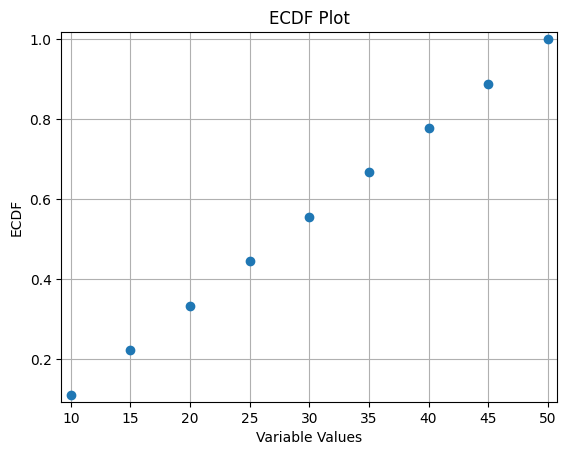

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50])

# Calculate the ECDF
x = np.sort(data)
y = np.arange(1, len(x) + 1) / len(x)
print(y)
# Create the ECDF plot
plt.plot(x, y, marker='o', linestyle='none')
plt.xlabel('Variable Values')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.margins(0.02)  # Add a small margin around the plot
plt.grid(True)
plt.show()

hello
